In [2]:
from keras.datasets import imdb
import numpy as np

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
c:\users\shinn\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
c:\users\shinn\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or

In [4]:
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape
    results = np.zeros((len(sequences), dimension))
    
    for i, sequence in enumerate(sequences):
        # Set specific indices of results[i] to 1s
        results[i, sequence] = 1.
        
    return results

In [5]:
# Our vectorized training data
x_train = vectorize_sequences(train_data)

# Our vectorized test data
x_test = vectorize_sequences(test_data)

# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [6]:
# Listing 4.3 page 105
from keras import models
from keras import layers

In [7]:
original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

In [8]:
# Listing 4.4 page 105
# Version of the model with lower capacity
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

In [9]:
original_hist = original_model.fit(x_train, y_train,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 48ms/step - loss: 0.5674 - acc: 0.7213 - val_loss: 0.3513 - val_acc: 0.8804
Epoch 2/20
49/49 [==============================] - 1s 18ms/step - loss: 0.2842 - acc: 0.9106 - val_loss: 0.2874 - val_acc: 0.8917
Epoch 3/20
49/49 [==============================] - 1s 18ms/step - loss: 0.2050 - acc: 0.9317 - val_loss: 0.2829 - val_acc: 0.8874
Epoch 4/20
49/49 [==============================] - 1s 17ms/step - loss: 0.1712 - acc: 0.9412 - val_loss: 0.3162 - val_acc: 0.8742
Epoch 5/20
49/49 [==============================] - 1s 17ms/step - loss: 0.1453 - acc: 0.9511 - val_loss: 0.3035 - val_acc: 0.8818
Epoch 6/20
49/49 [==============================] - 1s 17ms/step - loss: 0.1246 - acc: 0.9587 - val_loss: 0.3483 - val_acc: 0.8698
Epoch 7/20
49/49 [==============================] - 1s 17ms/step - loss: 0.1101 - acc: 0.9657 - val_loss: 0.3620 - val_acc: 0.8698
Epoch 8/20
49/49 [==============================] - 1s 17ms/step - loss: 0.0959 - a

In [10]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                epochs=20,
                                batch_size=512,
                                validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 6s 106ms/step - loss: 0.6212 - acc: 0.6336 - val_loss: 0.5222 - val_acc: 0.7753
Epoch 2/20
49/49 [==============================] - 1s 17ms/step - loss: 0.4874 - acc: 0.8360 - val_loss: 0.4811 - val_acc: 0.8394
Epoch 3/20
49/49 [==============================] - 1s 17ms/step - loss: 0.4363 - acc: 0.8930 - val_loss: 0.4691 - val_acc: 0.8405
Epoch 4/20
49/49 [==============================] - 1s 17ms/step - loss: 0.4074 - acc: 0.9186 - val_loss: 0.4486 - val_acc: 0.8806
Epoch 5/20
49/49 [==============================] - 1s 18ms/step - loss: 0.3838 - acc: 0.9362 - val_loss: 0.4577 - val_acc: 0.8586
Epoch 6/20
49/49 [==============================] - 1s 18ms/step - loss: 0.3587 - acc: 0.9477 - val_loss: 0.4586 - val_acc: 0.8617
Epoch 7/20
49/49 [==============================] - 1s 17ms/step - loss: 0.3393 - acc: 0.9560 - val_loss: 0.4453 - val_acc: 0.8722
Epoch 8/20
49/49 [==============================] - 1s 17ms/step - loss: 0.3214 - 

In [11]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

In [12]:
import matplotlib.pyplot as plt

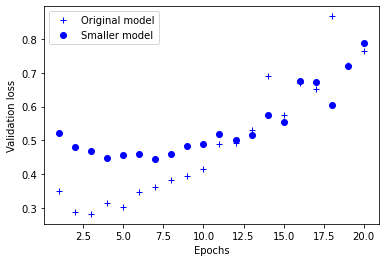

In [13]:
# b+ is for "blue cross"
plt.plot(epochs, original_val_loss, 'b+', label='Original model')

# "bo" is for "blue dot"
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')

plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [14]:
# Listing 4.5 page 106
# Version of the model with higher capacity
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(512, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                    loss='binary_crossentropy',
                    metrics=['acc'])

In [15]:
bigger_model_hist = bigger_model.fit(x_train, y_train,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 7s 122ms/step - loss: 0.5968 - acc: 0.7088 - val_loss: 0.3579 - val_acc: 0.8415
Epoch 2/20
49/49 [==============================] - 5s 105ms/step - loss: 0.2254 - acc: 0.9053 - val_loss: 0.4542 - val_acc: 0.8037
Epoch 3/20
49/49 [==============================] - 5s 107ms/step - loss: 0.1320 - acc: 0.9493 - val_loss: 0.3840 - val_acc: 0.8540
Epoch 4/20
49/49 [==============================] - 6s 118ms/step - loss: 0.0719 - acc: 0.9801 - val_loss: 0.4135 - val_acc: 0.8824
Epoch 5/20
49/49 [==============================] - 6s 126ms/step - loss: 0.0484 - acc: 0.9925 - val_loss: 0.4773 - val_acc: 0.8830
Epoch 6/20
49/49 [==============================] - 6s 125ms/step - loss: 0.0026 - acc: 0.9998 - val_loss: 0.6946 - val_acc: 0.8804
Epoch 7/20
49/49 [==============================] - 5s 110ms/step - loss: 0.0258 - acc: 0.9982 - val_loss: 0.6060 - val_acc: 0.8688
Epoch 8/20
49/49 [==============================] - 5s 112ms/step - loss: 8.

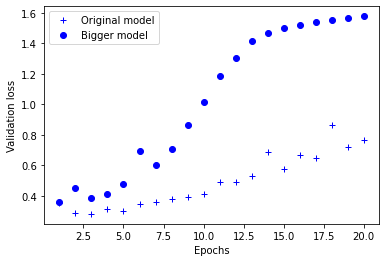

In [16]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')

plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

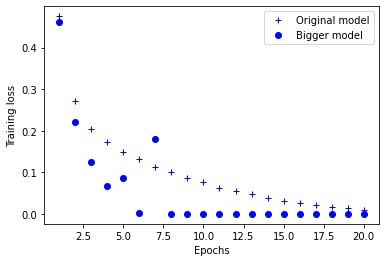

In [17]:
# The training losses for two networks
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')

plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

In [18]:
# Listing 4.6 page 108
# Weight regularization to the model
from keras import regularizers

In [19]:
l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                         activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                         activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [20]:
l2_model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['acc'])

In [21]:
l2_model_hist = l2_model.fit(x_train, y_train,
                            epochs=20,
                            batch_size=512,
                            validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 42ms/step - loss: 0.5906 - acc: 0.7239 - val_loss: 0.3762 - val_acc: 0.8798
Epoch 2/20
49/49 [==============================] - 1s 23ms/step - loss: 0.3211 - acc: 0.9048 - val_loss: 0.3744 - val_acc: 0.8628
Epoch 3/20
49/49 [==============================] - 1s 21ms/step - loss: 0.2650 - acc: 0.9234 - val_loss: 0.3476 - val_acc: 0.8770
Epoch 4/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2400 - acc: 0.9321 - val_loss: 0.3410 - val_acc: 0.8818
Epoch 5/20
49/49 [==============================] - 1s 24ms/step - loss: 0.2197 - acc: 0.9427 - val_loss: 0.3391 - val_acc: 0.8834
Epoch 6/20
49/49 [==============================] - 1s 21ms/step - loss: 0.2140 - acc: 0.9431 - val_loss: 0.3585 - val_acc: 0.8774
Epoch 7/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2064 - acc: 0.9453 - val_loss: 0.4024 - val_acc: 0.8608
Epoch 8/20
49/49 [==============================] - 1s 26ms/step - loss: 0.2060 - a

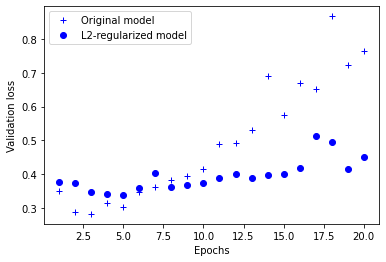

In [22]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')

plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [23]:
from keras import regularizers

In [24]:
# Listing 4.7 page 108
# L1regularization
regularizers.l1(0.001)

# L1 and L2 regularization at the same time
regularizers.l1_l2(l1=0.001, l2=0.001)

In [30]:
# Listing 4.8 page 110
# Adding dropout to the IMDB network
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))

dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))

dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [31]:
dpt_model_hist = dpt_model.fit(x_train, y_train,
                              epochs=20,
                              batch_size=512,
                              validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 41ms/step - loss: 0.6555 - acc: 0.5909 - val_loss: 0.4965 - val_acc: 0.8555
Epoch 2/20
49/49 [==============================] - 1s 22ms/step - loss: 0.5003 - acc: 0.7849 - val_loss: 0.3830 - val_acc: 0.8652
Epoch 3/20
49/49 [==============================] - 1s 20ms/step - loss: 0.3937 - acc: 0.8545 - val_loss: 0.3154 - val_acc: 0.8844
Epoch 4/20
49/49 [==============================] - 1s 19ms/step - loss: 0.3222 - acc: 0.8936 - val_loss: 0.2862 - val_acc: 0.8885
Epoch 5/20
49/49 [==============================] - 1s 20ms/step - loss: 0.2745 - acc: 0.9154 - val_loss: 0.2808 - val_acc: 0.8901
Epoch 6/20
49/49 [==============================] - 1s 19ms/step - loss: 0.2422 - acc: 0.9247 - val_loss: 0.2868 - val_acc: 0.8878
Epoch 7/20
49/49 [==============================] - 1s 20ms/step - loss: 0.2179 - acc: 0.9314 - val_loss: 0.2949 - val_acc: 0.8837
Epoch 8/20
49/49 [==============================] - 1s 20ms/step - loss: 0.1923 - a

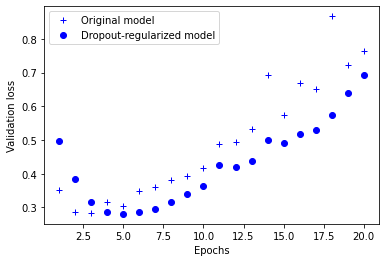

In [32]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')

plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()